In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
df = pd.read_csv('BTC-USD.csv')

print(df[df['Date'] == '2021-12-01'])
#df.drop(columns = ['Date', 'Adj Close'], inplace = True)

            Date          Open  ...     Adj Close       Volume
2632  2021-12-01  56907.964844  ...  57229.828125  36858195307

[1 rows x 7 columns]


## ANALYSIS

In [3]:
df['Date'] =  pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [6]:
df.shape

(2710, 7)

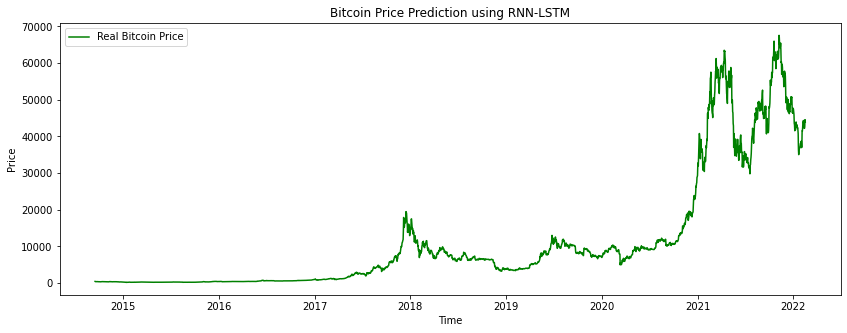

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['Close'], color = 'green', label = 'Real Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# NON-ML

In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
df = pd.read_csv('BTC-USD.csv')

print(df[df['Date'] == '2021-12-01'])
df.drop(columns = ['Adj Close'], inplace = True)

            Date          Open  ...     Adj Close       Volume
2632  2021-12-01  56907.964844  ...  57229.828125  36858195307

[1 rows x 7 columns]


In [ ]:
df[df['High'] == df['High'].max()]

,Date,Open,High,Low,Close,Volume
2611,2021-11-10,66953.335938,68789.625,63208.113281,64995.230469,48730828378


In [7]:
train_data = df['Close'].iloc[:2612].values
test_data = df['Close'].iloc[2612:].values
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [9]:
scale_list = []

smoothing_window_size = 1500
for di in range(0,2000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])
    scale_list.append(scaler.scale_)
    
# You normalize the last bit of remaining data
#scaler.fit(train_data[di+smoothing_window_size:,:])
#train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])
#scale_list.append(scaler.scale_)

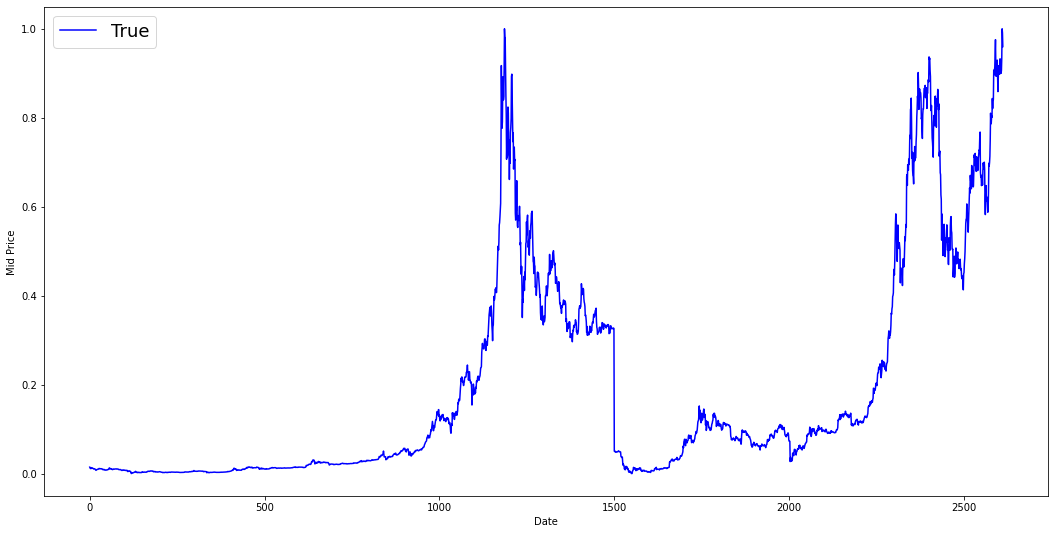

In [10]:
plt.figure(figsize = (18,9))
plt.plot(train_data,color='b',label='True')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [9]:
train_data = train_data.reshape(-1)

# Normalize test data
#test_data = scaler.transform(test_data).reshape(-1)

In [ ]:
# exponential moving average smoothing
# make data have a smoother curve
EMA = 0.0
gamma = 0.1
for ti in range(2612):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

all_mid_data = np.concatenate([train_data,test_data],axis=0)

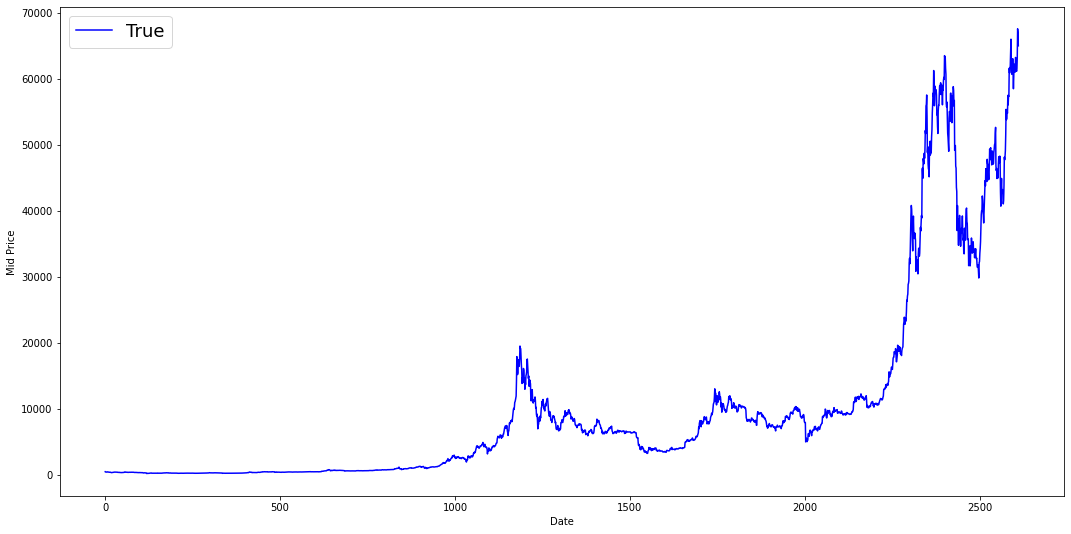

In [10]:
plt.figure(figsize = (18,9))
plt.plot(train_data,color='b',label='True')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [11]:
window_size = 30
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):
    date = df.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 3098898.57836


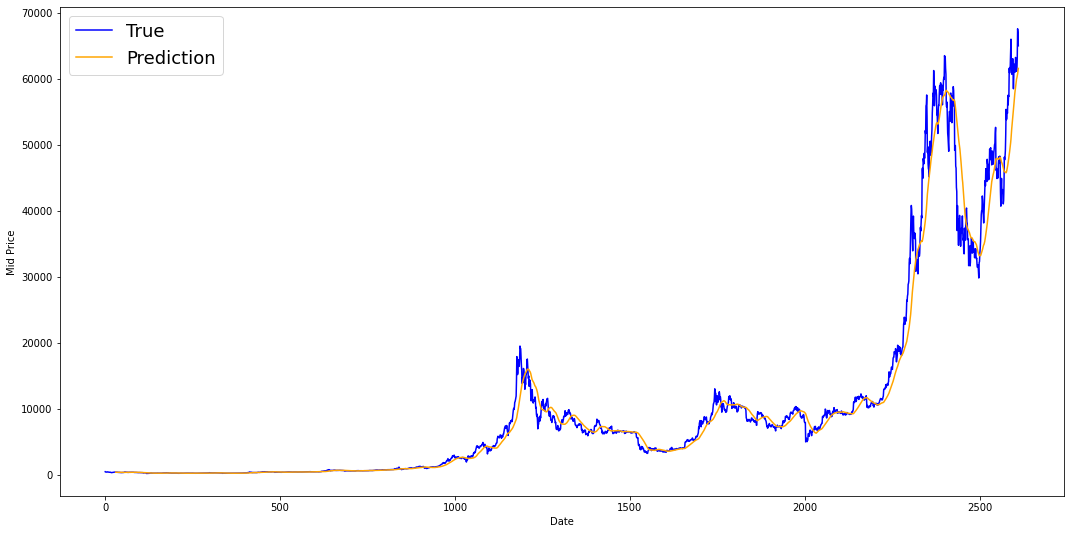

In [12]:
plt.figure(figsize = (18,9))
plt.plot(range(2612),train_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

## Exponential Moving Average 

In [13]:
window_size = 100
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 347218.46617


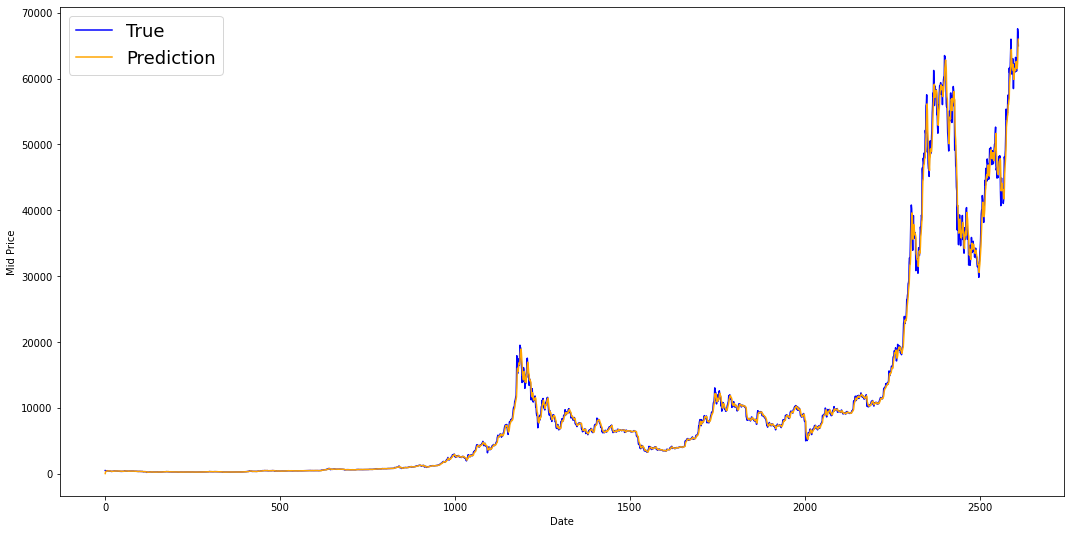

In [14]:
plt.figure(figsize = (18,9))
plt.plot(range(2612),train_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

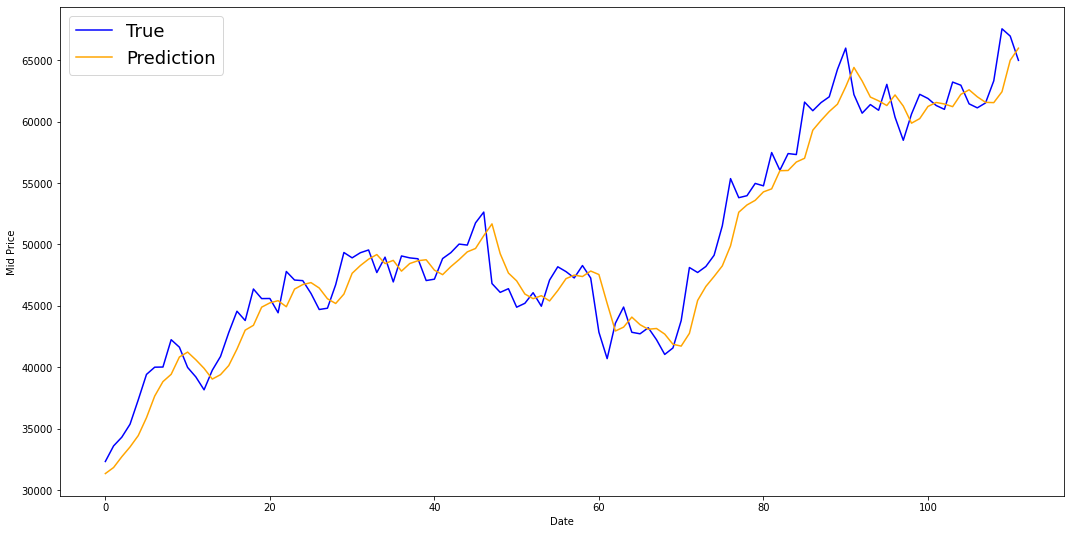

In [15]:
## Detail 
plt.figure(figsize = (18,9))
plt.plot(train_data[2500:],color='b',label='True')
plt.plot(run_avg_predictions[2500:],color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

## change back to original price range


In [ ]:
train_data = train_data.reshape(-1,1)
i = 0
for di in range(0,2000,smoothing_window_size):
    train_data[di:di+smoothing_window_size,:] = train_data[di:di+smoothing_window_size,:] * (1/scale_list[i][0])
    i += 1

# You normalize the last bit of remaining data
#train_data[di+smoothing_window_size:,:] = train_data[di+smoothing_window_size:,:] * (1/scale_list[i][0])

In [ ]:
i = 0
for di in range(0,2000,smoothing_window_size):
    std_avg_predictions[di:di+smoothing_window_size] = [x * (1/scale_list[i][0]) for x in std_avg_predictions[di:di+smoothing_window_size]]
    i += 1

# You normalize the last bit of remaining data
std_avg_predictions[di+smoothing_window_size:] = [x * (1/scale_list[i][0]) for x in std_avg_predictions[di+smoothing_window_size:]]

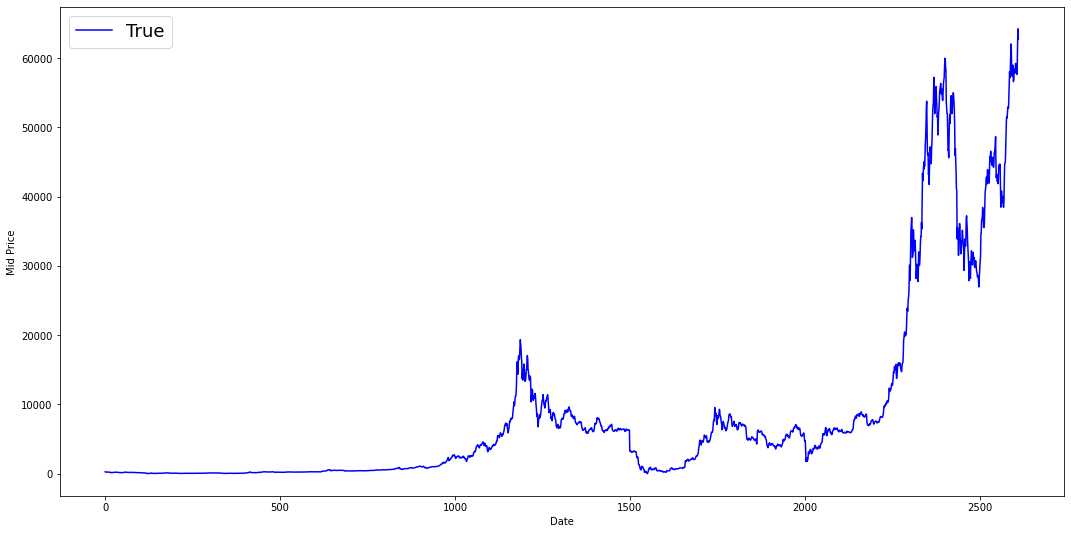

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(train_data,color='b',label='True')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

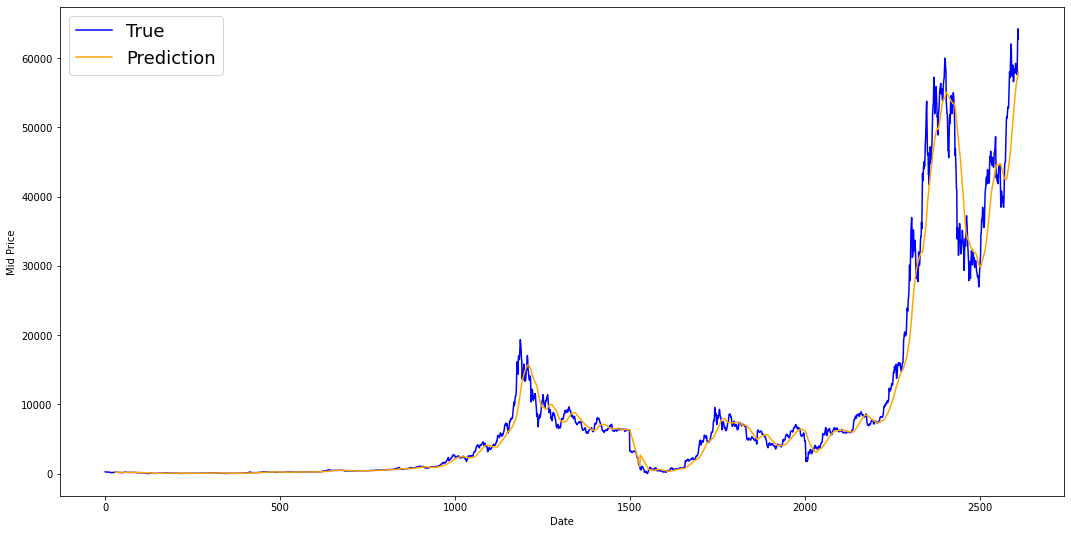

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(2612),train_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

# FIRST TRY : LSTM - 60-20-20 / prev 60



In [ ]:
df.drop(columns = ['Date', 'Adj Close'], inplace = True)
# train 60, val 20, test 20
train_df = df[:1626]
val_df = df[1626:2168]
test_df = df[2168:]
scaler = MinMaxScaler()
scaler.fit(train_df)

def data_prep(df):
  df = scaler.transform(df)

  X_train = []
  y_train = []
  for i in range(60, df.shape[0]):
    X_train.append(df[i-60:i])
    y_train.append(df[i,3])


  X_train, y_train = np.array(X_train), np.array(y_train)
  return X_train, y_train

X_train, y_train = data_prep(train_df)
X_val, y_val = data_prep(val_df)
X_test, y_test = data_prep(test_df)
print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)


(1566, 60, 5)
(1566,)
(482, 60, 5)
(482,)
(482, 60, 5)
(482,)


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units = 64, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 64, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 128, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 128, activation = 'relu'))
model.add(Dense(units = 1))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 60, 64)            17920     
                                                                 
 dropout_28 (Dropout)        (None, 60, 64)            0         
                                                                 
 lstm_39 (LSTM)              (None, 60, 64)            33024     
                                                                 
 dropout_29 (Dropout)        (None, 60, 64)            0         
                                                                 
 lstm_40 (LSTM)              (None, 60, 128)           98816     
                                                                 
 dropout_30 (Dropout)        (None, 60, 128)           0         
                                                                 
 lstm_41 (LSTM)              (None, 128)             

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)
model.compile(optimizer='adam', loss = 'mean_squared_error')
train_record = model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_split=0.1)

Epoch 1/50
45/45 [==============================] - 45s 795ms/step - loss: 0.0081 - val_loss: 0.0011
Epoch 2/50
45/45 [==============================] - 31s 685ms/step - loss: 0.0032 - val_loss: 0.0016
Epoch 3/50
45/45 [==============================] - 32s 701ms/step - loss: 0.0023 - val_loss: 7.9613e-04
Epoch 4/50
45/45 [==============================] - 33s 725ms/step - loss: 0.0029 - val_loss: 0.0017
Epoch 5/50
45/45 [==============================] - 32s 710ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 6/50
45/45 [==============================] - 30s 664ms/step - loss: 0.0018 - val_loss: 0.0035
Epoch 7/50
45/45 [==============================] - 30s 663ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 8/50
45/45 [==============================] - 30s 675ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 9/50
45/45 [==============================] - 31s 685ms/step - loss: 0.0013 - val_loss: 5.6871e-04
Epoch 10/50
45/45 [==============================] - 32s 710ms/step - loss: 0.0013 

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
scale = 1/scaler.scale_[3]

5.176171677498843e-05

In [ ]:
y_pred = y_pred * scale

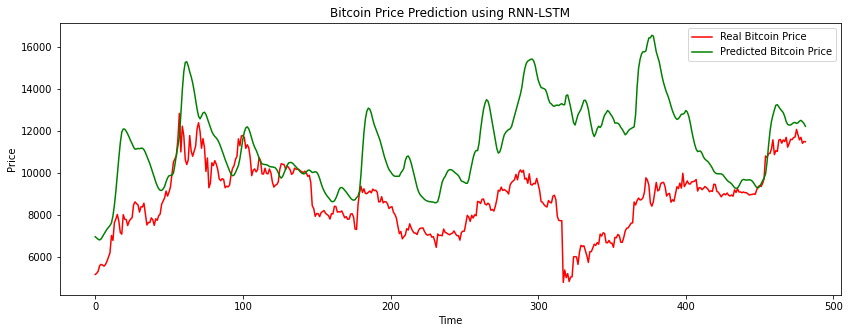

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_val * scale, color = 'red', label = 'Real Bitcoin Price')
plt.plot(y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
y_pred

#Second LSTM - 2021-12 ~ 

In [ ]:
train_df = df[:2632]
test_df = df[2572:]

scaler = MinMaxScaler()
scaler.fit(train_df)

def data_prep(df):
  df = scaler.transform(df)

  X_train = []
  y_train = []
  for i in range(60, df.shape[0]):
    X_train.append(df[i-60:i])
    y_train.append(df[i,3])

  X_train, y_train = np.array(X_train), np.array(y_train)
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 5))
  return X_train, y_train

X_train, y_train = data_prep(train_df)
X_test, y_test = data_prep(test_df)
print(X_train.shape)

(2572, 60, 5)


In [ ]:
y_train

array([0.00311297, 0.00310593, 0.00292475, ..., 0.68656304, 0.69744637,
       0.68451128])

In [ ]:
y_test

array([0.70499493, 0.69992592, 0.68676198, 0.67844393, 0.64388962,
       0.6378341 , 0.61404633, 0.61665862, 0.61929497, 0.61795439,
       0.6315263 , 0.64953   , 0.62938522, 0.63692548, 0.63807848,
       0.6371359 , 0.62432473, 0.62618086, 0.61681275, 0.6010251 ,
       0.53835732, 0.51718068, 0.53567866, 0.54128083, 0.5457278 ,
       0.54421594, 0.54846165, 0.55804927, 0.56330012, 0.5600269 ,
       0.56841886, 0.57227927, 0.54571267, 0.54870453, 0.61320009,
       0.61231402, 0.62672696, 0.64791524, 0.65204294, 0.6553128 ,
       0.64383189, 0.62666024, 0.62423448, 0.62353773, 0.62931618,
       0.65882089, 0.64971932])

In [ ]:
print(train_df.max())

Open      6.754973e+04
High      6.878962e+04
Low       6.638206e+04
Close     6.756683e+04
Volume    3.509679e+11
dtype: float64


In [ ]:
test_df.max()

Open      4.768093e+04
High      4.788141e+04
Low       4.685694e+04
Close     4.768681e+04
Volume    8.419661e+10
dtype: float64

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units = 64, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 64, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 128, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 128, activation = 'relu'))
model.add(Dense(units = 1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            17920     
                                                                 
 dropout (Dropout)           (None, 60, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 128)           98816     
                                                                 
 dropout_2 (Dropout)         (None, 60, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 128)              

In [ ]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.compile(optimizer='adam', loss = 'mean_squared_error')
train_record = model.fit(X_train, y_train, epochs = 45, batch_size = 32, validation_split=0.10)

Epoch 1/45
73/73 [==============================] - 57s 683ms/step - loss: 0.0040 - val_loss: 0.0466
Epoch 2/45
73/73 [==============================] - 51s 702ms/step - loss: 8.3176e-04 - val_loss: 0.0398
Epoch 3/45
73/73 [==============================] - 50s 691ms/step - loss: 9.2085e-04 - val_loss: 0.0366
Epoch 4/45
73/73 [==============================] - 58s 794ms/step - loss: 8.4132e-04 - val_loss: 0.0192
Epoch 5/45
73/73 [==============================] - 50s 688ms/step - loss: 6.1794e-04 - val_loss: 0.0168
Epoch 6/45
73/73 [==============================] - 51s 696ms/step - loss: 8.6094e-04 - val_loss: 0.0079
Epoch 7/45
73/73 [==============================] - 49s 677ms/step - loss: 6.8207e-04 - val_loss: 0.0304
Epoch 8/45
73/73 [==============================] - 50s 687ms/step - loss: 8.5781e-04 - val_loss: 0.0077
Epoch 9/45
73/73 [==============================] - 50s 689ms/step - loss: 6.1390e-04 - val_loss: 0.0210
Epoch 10/45
73/73 [==============================] - 50s 68

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
scale = 1/scaler.scale_[3]

y_pred = y_pred * scale
y_test = y_test * scale

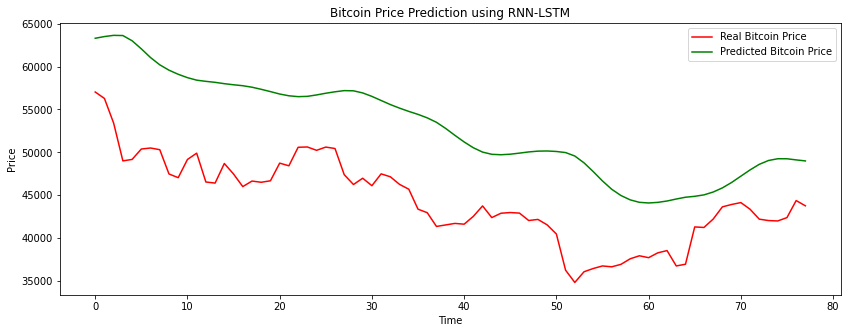

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# CLASSFICATION

In [ ]:
## new target -> will price go up compare to a day before
cls_df = df.copy()
cls_df['isUp'] = ''
for i in range(1, len(cls_df)):
  if cls_df['Close'].iloc[i] > cls_df['Close'].iloc[i - 1]:
    cls_df['isUp'].iloc[i] = 1
  else:
    cls_df['isUp'].iloc[i] = 0

cls_df.drop(0, inplace=True)
cls_df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Date,Open,High,Low,Close,Volume,isUp
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,24127600,1
...,...,...,...,...,...,...,...
2705,2022-02-12,42412.300781,42992.550781,41852.574219,42244.468750,18152390304,0
2706,2022-02-13,42236.566406,42693.054688,41950.941406,42197.515625,14741589015,0
2707,2022-02-14,42157.398438,42775.777344,41681.957031,42586.917969,20827783012,1
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,22721659051,1


In [ ]:
cls_df['isUp'].value_counts(normalize=True)

1    0.541897
0    0.458103
Name: isUp, dtype: float64

In [ ]:
# new target - if price is up more than 3% compare to previous day
up5_df = df.copy()
up5_df['isUp5'] = ''
for i in range(1, len(up5_df)):
  if ((up5_df['Close'].iloc[i] - up5_df['Close'].iloc[i-1]) / up5_df['Close'].iloc[i-1] * 100) >= 2:
    up5_df['isUp5'].iloc[i] = 1
  else:
    up5_df['isUp5'].iloc[i] = 0

up5_df.drop(0, inplace=True)
up5_df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Date,Open,High,Low,Close,Volume,isUp5
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,24127600,0
...,...,...,...,...,...,...,...
2705,2022-02-12,42412.300781,42992.550781,41852.574219,42244.468750,18152390304,0
2706,2022-02-13,42236.566406,42693.054688,41950.941406,42197.515625,14741589015,0
2707,2022-02-14,42157.398438,42775.777344,41681.957031,42586.917969,20827783012,0
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,22721659051,1


In [ ]:
up5_df['isUp5'].value_counts(normalize=True)

0    0.765596
1    0.234404
Name: isUp5, dtype: float64

In [ ]:
train_df = up5_df[:2632]
test_df = up5_df[2572:]

scaler = MinMaxScaler()
scaler.fit(train_df)

def data_prep(df):
  df = scaler.transform(df)

  X_train = []
  y_train = []
  for i in range(60, df.shape[0]):
    X_train.append(df[i-60:i])
    y_train.append(df[i,5])

  X_train, y_train = np.array(X_train), np.array(y_train)
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 6))
  return X_train, y_train

X_train, y_train = data_prep(train_df)
X_test, y_test = data_prep(test_df)
print(X_train.shape)

ValueError: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units = 64, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 6)))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 64, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 128, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.summary()

#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
train_record = model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_split=0.10)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 60, 64)            18176     
                                                                 
 dropout_5 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_8 (LSTM)               (None, 60, 64)            33024     
                                                                 
 dropout_6 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_9 (LSTM)               (None, 60, 128)           98816     
                                                                 
 dropout_7 (Dropout)         (None, 60, 128)           0         
                                                                 
 lstm_10 (LSTM)              (None, 128)              

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 83.12%


In [ ]:
pred = model.predict(X_test)
pred_classes_output = pred.argmax(axis=1)
pred_classes_output

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_classes_output))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91        64
         1.0       0.00      0.00      0.00        13

    accuracy                           0.83        77
   macro avg       0.42      0.50      0.45        77
weighted avg       0.69      0.83      0.75        77



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LSTM - Window Normalization 

In [ ]:
def data_prep(df):

  X_train = []
  y_train = []
  for i in range(30, len(df)):
    X_train.append(df[i-30:i])
    y_train.append(df[i])


  X_train, y_train = np.array(X_train), np.array(y_train)
  X_train = np.reshape(X_train, (len(X_train), 30, 1))

  return X_train, y_train

X_train, y_train = data_prep(train_data)

In [ ]:
train_data = mid_prices[:2612]
test_data = mid_prices[2612:]
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [ ]:
def data_prep(df):

  X_train = []
  y_train = []
  for i in range(30, len(df)):
    X_train.append(df[i-30:i])
    y_train.append(df[i])


  X_train, y_train = np.array(X_train), np.array(y_train)
  X_train = np.reshape(X_train, (len(X_train), 30, 1))

  return X_train, y_train

X_train, y_train = data_prep(train_data)

In [ ]:
test_data = test_data.reshape(-1,1)
X_test, y_test = data_prep(test_data)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units = 64, activation = 'relu', return_sequences = True, input_shape = (30, 1)))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 64, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 128, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 128, activation = 'relu'))
model.add(Dense(units = 1))
model.summary()
model.compile(optimizer='adam', loss = 'mean_squared_error')
train_record = model.fit(X_train, y_train, epochs = 45, batch_size = 32, validation_split=0.10)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 30, 64)            16896     
                                                                 
 dropout_17 (Dropout)        (None, 30, 64)            0         
                                                                 
 lstm_24 (LSTM)              (None, 30, 64)            33024     
                                                                 
 dropout_18 (Dropout)        (None, 30, 64)            0         
                                                                 
 lstm_25 (LSTM)              (None, 30, 128)           98816     
                                                                 
 dropout_19 (Dropout)        (None, 30, 128)           0         
                                                                 
 lstm_26 (LSTM)              (None, 128)              

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
scale_list[1][0]

1.5570779984525276e-05

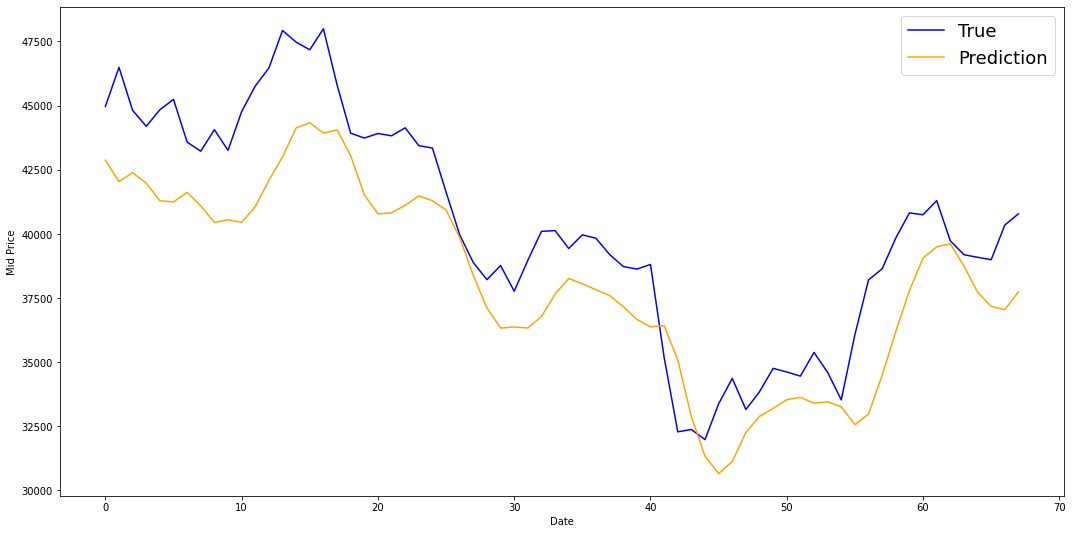

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(y_test * (1/scale_list[1][0]), color='b',label='True')
plt.plot(y_pred * (1/scale_list[1][0]),color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

# more than one day

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
df = pd.read_csv('BTC-USD.csv')

print(df[df['Date'] == '2021-12-01'])
df.drop(columns = ['Date', 'Adj Close'], inplace = True)

            Date          Open  ...     Adj Close       Volume
2632  2021-12-01  56907.964844  ...  57229.828125  36858195307

[1 rows x 7 columns]


In [ ]:
pred_result = []
for x in range(5):
  y_pred = model.predict(X_test)
  pred_result.append(y_pred)
  for test_input in X_test:
    test_input.pop(0)
    test_input.append(y_pred.pop(0))

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(y_test * (1/scale_list[1][0]), color='b',label='True')
plt.plot(y_pred * (1/scale_list[1][0]),color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [ ]:
pred_result = []
for x in range(5):
  y_pred = model.predict(X_test)
  pred_result.append(y_pred)
  for test_input in X_test:
    test_input.pop(0)
    test_input.append(y_pred.pop(0))